# Credit Card Fraud Detection using Logistic Regression

## Introduction

Credit card fraud is a significant problem for both financial institutions and consumers.  It involves unauthorized and illegal use of credit cards for financial gain. This project aims to develop a model for detecting fraudulent credit card transactions using machine learning, specifically logistic regression. Logistic regression is a suitable algorithm for this task as it is effective in binary classification problems, where the goal is to predict one of two possible outcomes (fraudulent or legitimate).

This project utilizes a dataset of credit card transactions to train and evaluate the model. The dataset contains features representing various transaction attributes, such as transaction amount, time, and location. By analyzing these features, the model learns patterns that distinguish fraudulent transactions from legitimate ones.

The goal of this project is to build a model with high accuracy in identifying fraudulent transactions while minimizing false positives, which can inconvenience legitimate customers. By effectively detecting and preventing credit card fraud, this project can contribute to enhancing the security and reliability of online payment systems.

In [1]:
# import numpy ,pandas and scikit learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# code to unzip folder using python save the unzip file

import zipfile

def unzip_folder(zip_path, extract_path):
  """Unzips a folder.

  Args:
    zip_path: The path to the zip file.
    extract_path: The path to extract the files to.
  """
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Example usage:
zip_path = '/content/creditcard.csv.zip'  # Replace with your zip file path
extract_path = '/content/extracted_folder'  # Replace with your desired extraction path

unzip_folder(zip_path, extract_path)

In [4]:
df = pd.read_csv('/content/extracted_folder/creditcard.csv')

In [7]:
df_input = df.drop(columns='Class',axis='column')
df_output = df['Class']

In [8]:
df_input

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [9]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(df_input,df_output,test_size=0.2,stratify=df_output,random_state=2)

# what is stratify

In [10]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(x_test)

In [13]:
model.score(x_test,y_test)

0.9989993328885924

Text(50.722222222222214, 0.5, 'Truth')

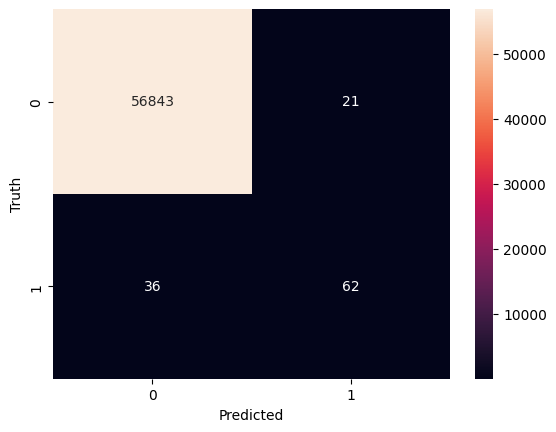

In [14]:
# create a heat map using confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# implement confusion matrix and visualise
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
y_test

,Class
238976,0
143962,0
179211,0
121522,0
104681,0
...,...
265295,0
149668,0
9862,0
239759,0


In [19]:
# so 0 means fraud and 1 means legitimate

In [20]:
import joblib

# Save the model to a file
joblib.dump(model, 'logistic_regression_model_credit_card.joblib')

['logistic_regression_model_credit_card.joblib']

In [36]:
# provide the first element in x_test to model predict
model.predict([x_test.iloc[0]])

# why is it required and also numpy learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])